# **Práctica 7: k-medias (k-means)**
José Luis Haro Díaz

In [ ]:
#Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [ ]:
#Cargar base de datos IRIS
iris = datasets.load_iris()
X = iris.data

#Escalar los datos para mejor desempeño
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Implementar algoritmo K-Means
class KMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        #Inicializar centroides aleatoriamente
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            #Asignar cada punto al centroide más cercano
            labels = self._assign_labels(X)

            #Actualizar centroides
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

            #Verificar convergencia
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

        self.labels_ = self._assign_labels(X)
        return self

    def _assign_labels(self, X):
        #Calcular distancia euclidiana
        distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
        return np.argmin(distances, axis=1)

In [ ]:
#Aplicar K-Means (2D)
def aplicar_kmeans(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.centroids

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
    plt.title(f'K-Means con {n_clusters} centroides (2D)')
    plt.xlabel('Característica 1 (escalada)')
    plt.ylabel('Característica 2 (escalada)')
    plt.grid(True)
    plt.show()

In [ ]:
#Aplicar K-Means (3D)
def aplicar_kmeans_con_3d(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_

    df = pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
    df['cluster'] = labels

    fig = px.scatter_3d(
        df,
        x='sepal_length',
        y='sepal_width',
        z='petal_length',
        color='cluster',
        title=f'K-Means 3D con {n_clusters} centroides',
        opacity=0.7
    )
    fig.show()

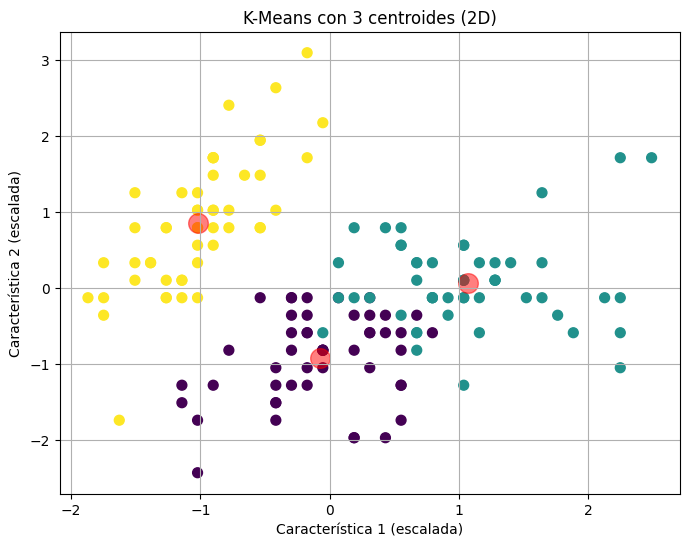

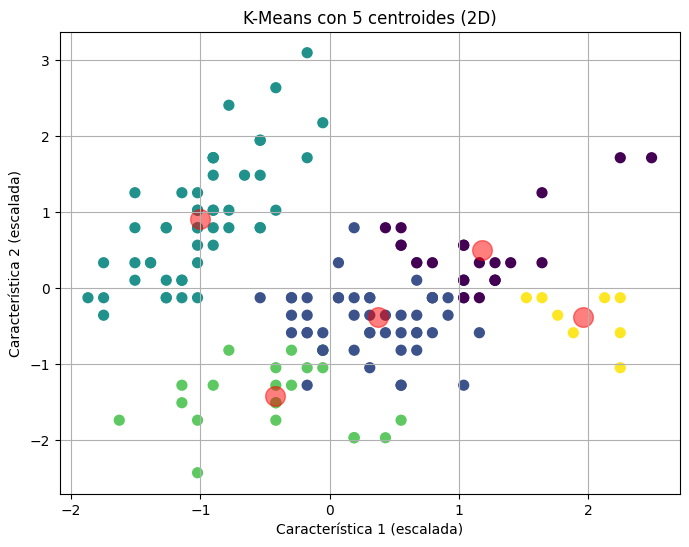

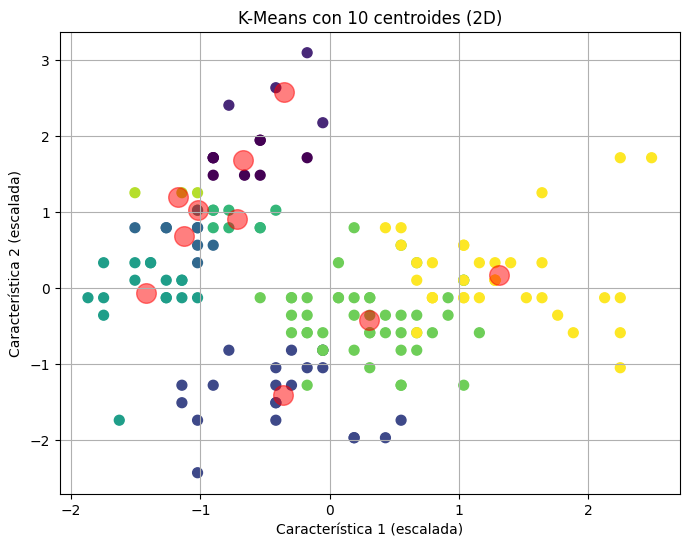

In [ ]:
#Ejecutar para 3, 5 y 10 centroides en 2D
for k in [3, 5, 10]:
    aplicar_kmeans(X_scaled, n_clusters=k)

In [ ]:
#Ejecutar para 3, 5 y 10 centroides en 3D
for k in [3, 5, 10]:
    aplicar_kmeans_con_3d(X_scaled, n_clusters=k)